# Spotify Music Data Analysis in Quarantine: EDA

<p>Students:</p>
<ul>
    <li> Ronie Arauco </li>
    <li> Handry Guillen </li>
<ul>

The data that we are using have been extracted first from SpotifyCharts (Official Spotify page for Top 50 and Top viral 50), this data contains all the Top 50 id's tracks for each country available for Spotify.

Once we have the id's, we make use of Spotify API for extract all the variables available for each track. These are the follows:

|Fields|Type|Description|
|---|---|---|
|country|string|Country of the Top 50 Playlist.|
|date_extraction|timestamp|Date of the Top 50 Playlist.|
|track_id|string|The Spotify ID for the track.|
|streams|int|Number of streams of the track.|
|album|string|The album on which the track appears.|
|artist|string|The artists who performed the track.|
|duration_ms|int|The duration of the track in milliseconds.|
|track_name|string|The name of the track.|
|track_danceability|float|Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.|
|track_energy|float|Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.|
|track_key|int|The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.|
|track_loudness|float|The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.|
|track_mode|int|Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|track_speechiness|float|Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.|
|track_acousticness|float|A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.|
|track_instrumentalness|float|Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.|
|track_liveness|float|Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.|
|track_valence|float|A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).|
|track_tempo|float|The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.|
|explicit|bool|One (1) when the track has explicit lyrics.|
|not_explicit|bool|Zero (0) when the track doesn't have explicit lyrics.|

In [ ]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('display.max_columns', 100)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. EDA

### 1.1. Reading the data

In [ ]:
# Just for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df_southamerica = pd.read_csv('/content/drive/My Drive/data-analysis-ta-2020/dataset_tracks_southamerica.csv')

In [ ]:
df_southamerica.shape

(2166, 21)

In [ ]:
df_southamerica.sample(5)

,country,date_extraction,track_id,streams,album,artist,duration_ms,track_name,track_danceability,track_energy,track_key,track_loudness,track_mode,track_speechiness,track_acousticness,track_instrumentalness,track_liveness,track_valence,track_tempo,not_explicit,explicit
1100,Colombia,2020-04-25,2ZN0GHIwy1KLEJODW1uVkO,0.012314,FERXXO (VOL 1: M.O.R),Feid,0.060473,AVXNTADXR,0.849,0.409,0.090909,0.420162,1.0,0.4220,0.252,0.0,0.1010,0.407,0.199567,1,0
593,Bolivia,2020-02-23,4BKOjYosPhw334moS3wlbO,0.000516,MAP OF THE SOUL : 7,BTS,0.136140,Inner Child,0.589,0.696,1.000000,0.485107,1.0,0.0725,0.017,0.0,0.0808,0.332,0.512235,1,0
1283,Paraguay,2020-05-15,3MFDQq6V7GW6OmhVWIyrHO,0.002169,La Magia Del Amor,Los Angeles De Charly,0.098066,Amor Secreto,0.574,0.684,0.454545,0.751831,1.0,0.0256,0.138,0.0,0.3250,0.851,0.682300,1,0
1041,Brazil,2020-04-20,3A1LphuJ5lQD6NjPtxtYFh,0.088332,O Céu Explica Tudo (Ao Vivo),Henrique & Juliano,0.080897,Aquela Pessoa - Ao Vivo,0.688,0.744,0.000000,0.606749,1.0,0.0351,0.535,0.0,0.3760,0.751,0.329330,1,0
1940,Paraguay,2020-06-11,39Yp9wwQiSRIDOvrVg7mbk,0.002790,THE SCOTTS,"THE SCOTTS,Travis Scott,Kid Cudi",0.083147,THE SCOTTS,0.716,0.537,0.000000,0.503174,0.0,0.0514,0.233,0.0,0.1570,0.280,0.478407,0,1


### 1.2. Correlation

In [ ]:
df_southamerica.describe()

,streams,duration_ms,track_danceability,track_energy,track_key,track_loudness,track_mode,track_speechiness,track_acousticness,track_instrumentalness,track_liveness,track_valence,track_tempo,not_explicit,explicit
count,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000
mean,0.051602,0.117866,0.699316,0.688952,0.476748,0.609655,0.593721,0.108245,0.291959,0.008253,0.215208,0.649709,0.445958,0.831948,0.168052
std,0.085113,0.047439,0.123201,0.151550,0.335323,0.125340,0.491251,0.097859,0.223690,0.065928,0.210801,0.218738,0.220942,0.373999,0.373999
min,0.000000,0.000000,0.218000,0.111000,0.000000,0.000000,0.000000,0.023200,0.000189,0.000000,0.019100,0.042300,0.000000,0.000000,0.000000
25%,0.003109,0.090174,0.627000,0.590000,0.181818,0.544951,0.000000,0.043025,0.106000,0.000000,0.090725,0.499000,0.248910,1.000000,0.000000
50%,0.018080,0.110031,0.715500,0.708000,0.454545,0.624220,1.000000,0.067850,0.246000,0.000000,0.126000,0.682500,0.410581,1.000000,0.000000
75%,0.086136,0.135138,0.789000,0.804000,0.818182,0.692163,1.000000,0.134000,0.445000,0.000021,0.254000,0.827000,0.614561,1.000000,0.000000
max,1.000000,1.000000,0.979000,0.992000,1.000000,1.000000,1.000000,0.841000,0.978000,0.921000,0.985000,0.987000,1.000000,1.000000,1.000000


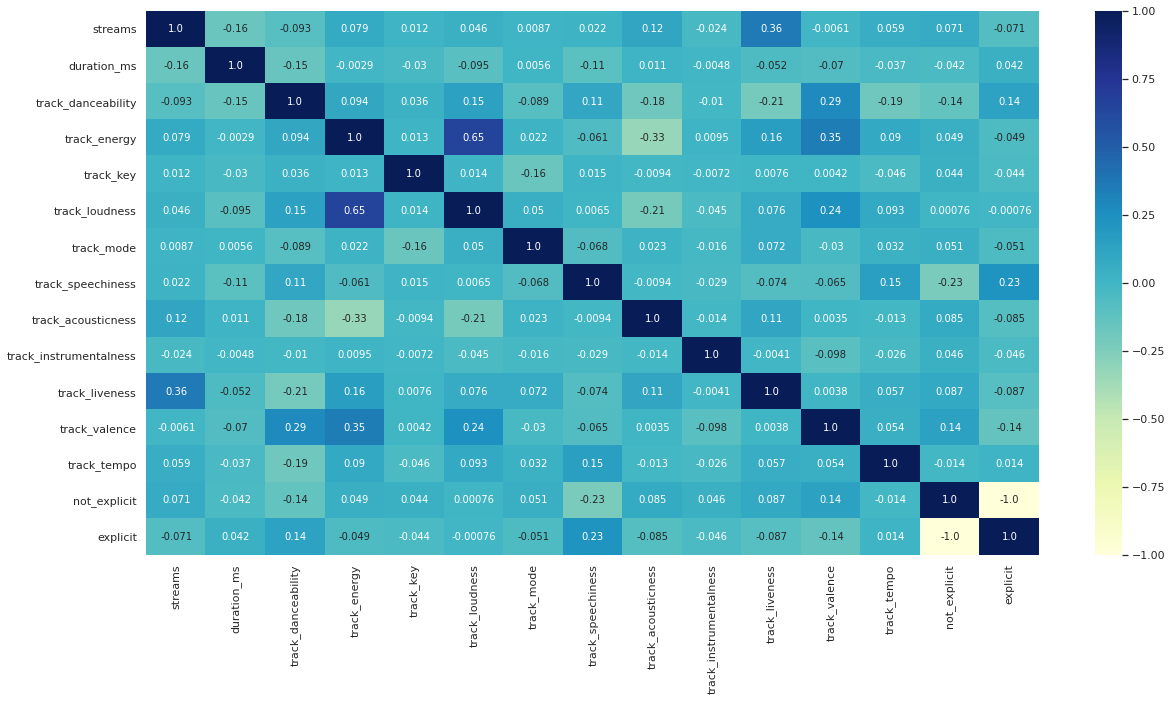

In [ ]:
plt.figure(figsize=(20, 10))
hm = sns.heatmap(df_southamerica.corr('pearson'), annot=True, fmt='.2',cmap='YlGnBu')

There are some interesting correlations in the heatmap:

* track_energy, track_loudness
* track_energy, track_acousticness
* track_energy, track_valence
* track_danceability, track_valence
* streams, track_liveness

Lets plot this correlations with Peru data.

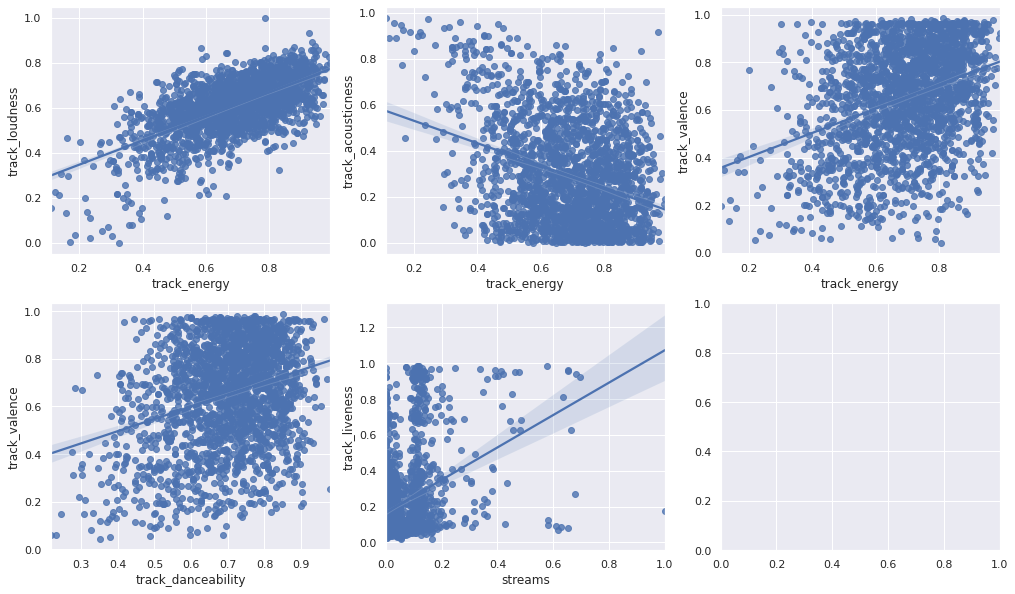

In [ ]:
f, axes = plt.subplots(2, 3, figsize=(17, 10), sharex=False, sharey=False)
sns.regplot(x='track_energy', y='track_loudness', data=df_southamerica, ax=axes.flat[0])
sns.regplot(x='track_energy', y='track_acousticness', data=df_southamerica, ax=axes.flat[1])
sns.regplot(x='track_energy', y='track_valence', data=df_southamerica, ax=axes.flat[2])
sns.regplot(x='track_danceability', y='track_valence', data=df_southamerica, ax=axes.flat[3])
sns.regplot(x='streams', y='track_liveness', data=df_southamerica, ax=axes.flat[4])

Loudness and energy are highly correlated (0.75) so we can consider both as redundant. By common sense and for the way this feature was built, we are choosing energy instead of loudness for our model. Energy measures intensity, fastness and track activity.
Also, if we can see the heatmap, explicit and not explicit features are redudant as well. So we can remove one of them.

In [ ]:
pearson_coef, p_value = stats.pearsonr(df_southamerica['track_energy'], df_southamerica['track_loudness'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.6502547398727607 with a P-value of P = 1.4143683419672717e-260


In [ ]:
pearson_coef, p_value = stats.pearsonr(df_southamerica['track_energy'], df_southamerica['track_acousticness'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.32996419499653346 with a P-value of P = 3.524044192510565e-56


In [ ]:
pearson_coef, p_value = stats.pearsonr(df_southamerica['track_energy'], df_southamerica['track_valence'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.3511087884949091 with a P-value of P = 7.316738365808293e-64


In [ ]:
pearson_coef, p_value = stats.pearsonr(df_southamerica['track_danceability'], df_southamerica['track_valence'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.28894460878470835 with a P-value of P = 6.371638441662151e-43


In [ ]:
pearson_coef, p_value = stats.pearsonr(df_southamerica['streams'], df_southamerica['track_liveness'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.3648646339606789 with a P-value of P = 3.460127369025958e-69


The p-value give the certainess of the pearson correlation.

### 1.3. Important Features

These are the features selected.

* track_energy
* track_acousticness
* track_valence
* track_danceability
* track_liveness
* track_key
* track_mode
* track_speechness
* track_instrumentalness
* track_tempo
* not_explicit


Now, we are going to apply stepwise selection feature using the K-Means algorithm.